# Complete pipeline

## Introductory notes:
This notebook presents minimal functionality needed to go through the cleaning, ICA and spectral and event analyses stages.
* For the cleaning part the functionality consists of resampling, filtering, bad channels and bad data spans annotation and bad channels interpolation.
* For the ICA part it is fitting and selecting components you want to exclude.
* For the spectral analyses part it is spectrogram+hypnogram, PSD per sleep stage and topomap per sleep stage per frequency band.
* For the events detection it is spindles, slow waves and rapid eye movements detection and analysis.

For the extended functionality check out corresponding notebooks.

### Import module

In [1]:
from sleepeeg.pipeline import (
    CleaningPipe, ICAPipe, SpectralPipe, 
    SpindlesPipe, SlowWavesPipe, RapidEyeMovementsPipe
    )
from sleepeeg.dashboard import create_dashboard

## Cleaning

Initialize `CleaningPipe` object by providing it with path to eeg file and output directory in which you want the data to be saved.

In [2]:
pipe = CleaningPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\EL3001\EL3001_SLEEP.mff",
    output_dir=r"C:\Users\Gennadiy\Documents\data\EL3001",
)

Reading EGI MFF Header from C:\Users\Gennadiy\Documents\data\EL3001\EL3001_SLEEP.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {} ...


In [2]:
pipe = CleaningPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe/resampled_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\EL3001",
)

Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\resampled_raw.fif...
    Range : 0 ... 1994499 =      0.000 ...  7977.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\resampled_raw-1.fif...
    Range : 1994500 ... 3988999 =   7978.000 ... 15955.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\resampled_raw-2.fif...
    Range : 3989000 ... 5983499 =  15956.000 ... 23933.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\resampled_raw-3.fif...
    Range : 5983500 ... 5985607 =  23934.000 ... 23942.428 secs
Ready.


### Resampling
This can take more than an hour depending on eeg signal size and specs of the computer you're running the analysis on.

In [3]:
pipe.resample(
    sfreq=250,  # Desired new sampling frequency
)

28 events found
Event IDs: [1 2]
28 events found
Event IDs: [1 2]


In [4]:
pipe.save_raw('resampled_raw.fif')

Writing C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\resampled_raw.fif
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\resampled_raw-1.fif
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\resampled_raw-2.fif
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\resampled_raw-3.fif
Closing C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\resampled_raw-3.fif
Closing C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\resampled_raw-2.fif
Closing C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\resampled_raw-1.fif
Closing C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\resampled_raw.fif
[done]


### Filtering
Bandpass and notch filters

In [3]:
pipe.filter(l_freq=0.3, h_freq=None)

Reading 0 ... 5985607  =      0.000 ... 23942.428 secs...


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Filter length: 2751 samples (11.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   16.4s


In [4]:
pipe.notch(freqs="50s")

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   15.7s


### Select bad channels and epochs

Select bad channels in the opened browser.

In [ ]:
pipe.plot()

In [5]:
pipe.read_bad_channels()

In [6]:
pipe.interpolate_bads(reset_bads=True)

Interpolating bad channels
    Automatic origin fit: head of radius 96.5 mm
Computing interpolation matrix from 234 sensor positions


Interpolating 23 sensors


Interpolated channels: ['E9', 'E10', 'E18', 'E35', 'E37', 'E64', 'E68', 'E69', 'E84', 'E91', 'E92', 'E157', 'E192', 'E200', 'E208', 'E209', 'E215', 'E216', 'E217', 'E219', 'E229', 'E244', 'E256']


Select bad epochs

Click "a" -> "Add description" -> Enter BAD_EPOCH -> Annotate bad data spans

In [ ]:
pipe.plot(butterfly=True)

In [7]:
pipe.read_annotations()

c:\Users\Gennadiy\Documents\eeg-processing-pipeline\sleepeeg\pipeline.py:108: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  self.mne_raw.set_annotations(read_annotations(p))


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:   25.1s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


average reference has been applied
Hypnogram is SHORTER than data by 0.43 seconds. Padding hypnogram with last value to match data.size.
Hypnogram is SHORTER than data by 0.43 seconds. Padding hypnogram with last value to match data.size.


Setting 289553 of 5985608 (4.84%) samples to NaN, retaining 5696055 (95.16%) samples.
Setting 289553 of 5985608 (4.84%) samples to NaN, retaining 5696055 (95.16%) samples.
Setting 289553 of 5985608 (4.84%) samples to NaN, retaining 5696055 (95.16%) samples.
Setting 289553 of 5985608 (4.84%) samples to NaN, retaining 5696055 (95.16%) samples.
Setting 289553 of 5985608 (4.84%) samples to NaN, retaining 5696055 (95.16%) samples.
Setting 289553 of 5985608 (4.84%) samples to NaN, retaining 5696055 (95.16%) samples.


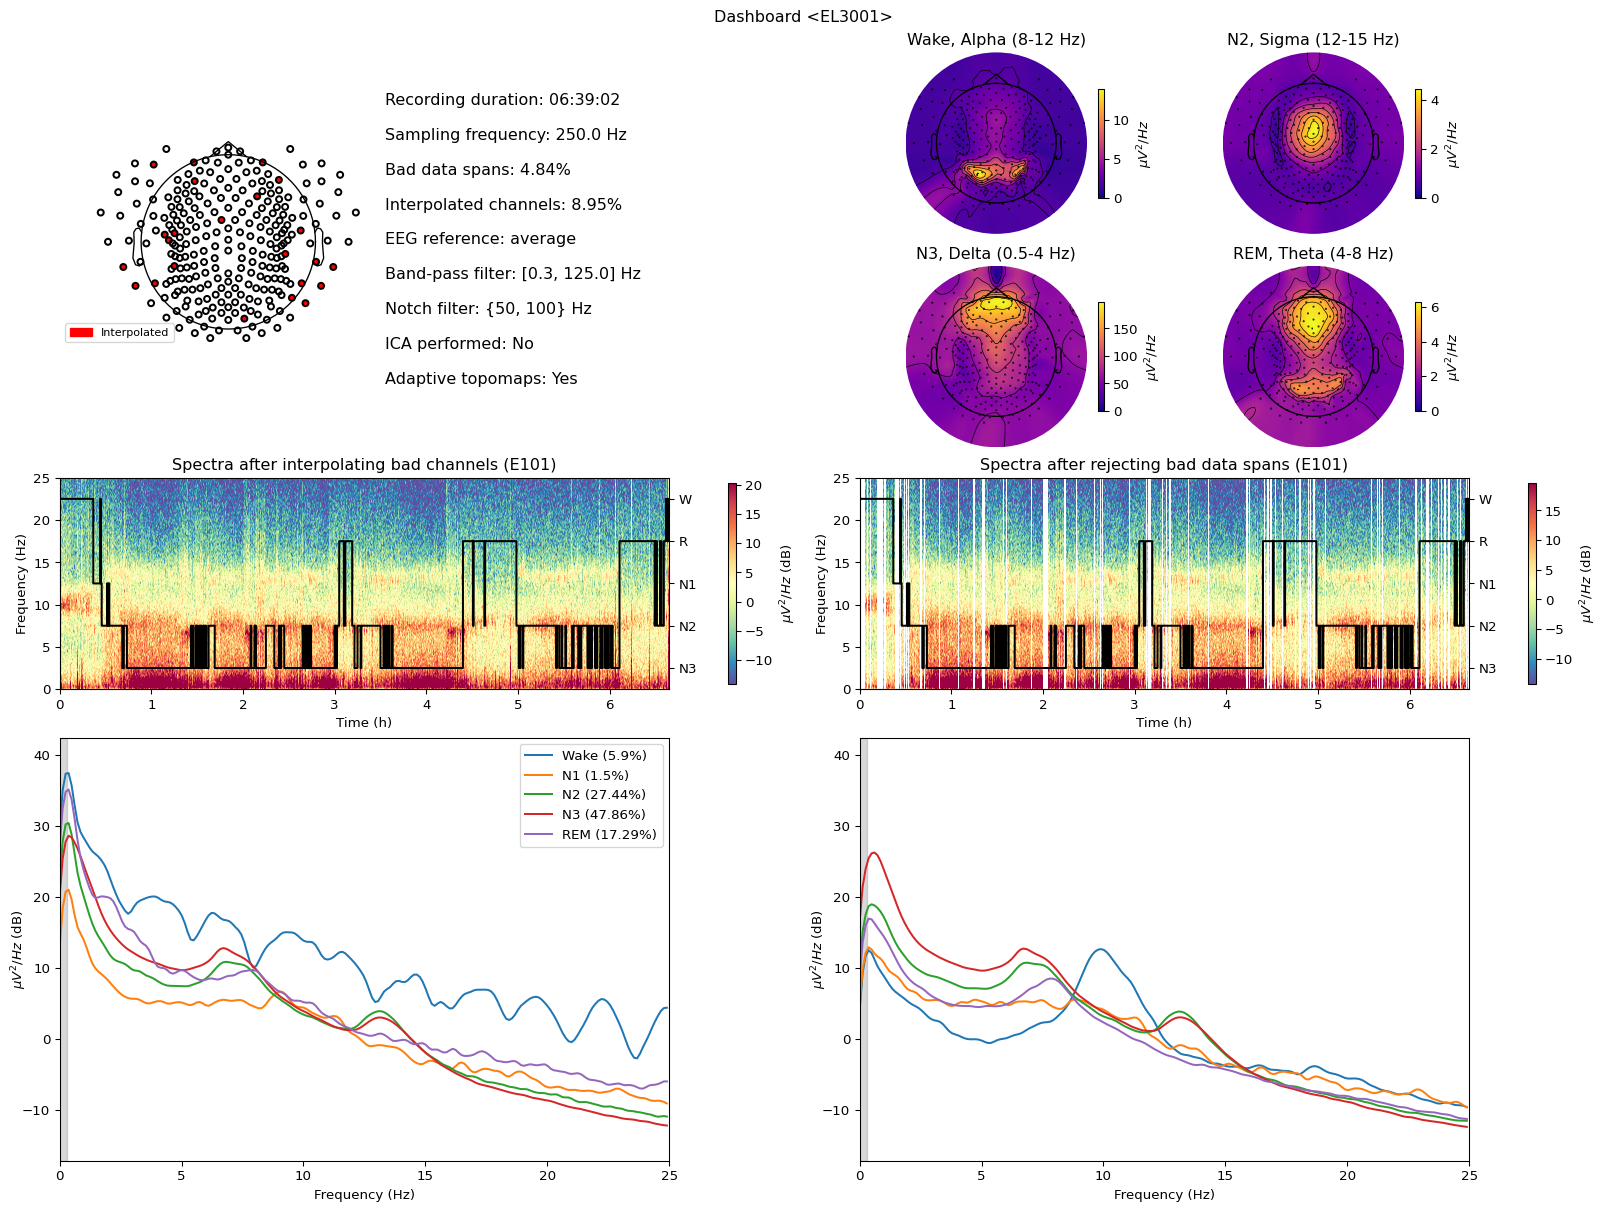

In [10]:
fig = create_dashboard(
    subject_code='EL3001', 
    prec_pipe=pipe, 
    path_to_hypnogram=r"C:\Users\Gennadiy\Documents\data\EL3001\staging.txt",
    hypno_freq=1,
    reference="average")

## ICA

Pass the preceding (cleaning) pipe to the ICAPipe.

In [11]:
ica_pipe = ICAPipe(prec_pipe=pipe, n_components=30)

Fit the ICA on the 1 Hz high-pass fitered data.

In [12]:
ica_pipe.fit()

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   16.9s


Fitting ICA to data using 257 channels (please be patient, this may take a while)
Omitting 289553 of 5985608 (4.84%) samples, retaining 5696055 (95.16%) samples.
Selecting by number: 30 components
Fitting ICA took 354.4s.


Visually inspect ICA components.

In [14]:
ica_pipe.plot_sources()

Creating RawArray with float64 data, n_channels=30, n_times=5985608
    Range : 0 ... 5985607 =      0.000 ... 23942.428 secs
Ready.


Pass to the `exclude` argument indices of components you want to remove from the raw signal.

In [15]:
ica_pipe.apply()

Excluded ICA components: [1, 26, 9]


Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 257 PCA components


## Spectral

Pass the preceding (cleaning or ICA) pipe to the SpectralPipe. Also provide pass to the hypnogram and don't forget to pass its frequency to the corresponding parameter.

In [16]:
spectral_pipe = SpectralPipe(
    prec_pipe=pipe,
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\EL3001\staging.txt",
    hypno_freq=1,
)

Hypnogram is SHORTER than data by 0.43 seconds. Padding hypnogram with last value to match data.size.


If you don't have a hypnogram, you can use the method `predict_hypno`, which will use [YASA's algorithm](https://raphaelvallat.com/yasa/build/html/generated/yasa.SleepStaging.html#yasa.SleepStaging). 

Make sure that the electrodes you provide are clean.

In [ ]:
# spectral_pipe.predict_hypno(
#         eeg_name = "E183",
#         eog_name = "E252",
#         emg_name = "E247",
#         ref_name = "E26",
#         save=False
# )

Pass an electrode name to calculate spectrogram for (e.g., E101)

Setting 289553 of 5985608 (4.84%) samples to NaN, retaining 5696055 (95.16%) samples.


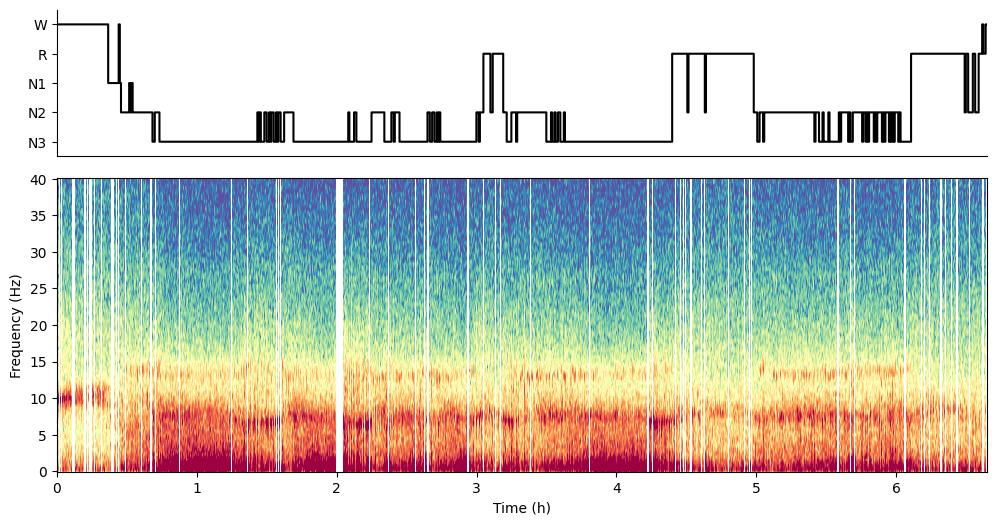

In [19]:
spectral_pipe.plot_hypnospectrogram(picks=["E101"])

In [20]:
spectral_pipe.compute_psds_per_stage(
    sleep_stages={"Wake": 0, "N1": 1, "N2/3": (2, 3), "REM": 4},
    reference="average",
    # Additional arguments passed to the PSD computing method, i.e., welch or multitaper:
    n_fft=1024,
    n_per_seg=1024,
    n_overlap=512,
    window="hamming",
)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting 289553 of 5985608 (4.84%) samples to NaN, retaining 5696055 (95.16%) samples.
Setting 289553 of 5985608 (4.84%) samples to NaN, retaining 5696055 (95.16%) samples.
Setting 289553 of 5985608 (4.84%) samples to NaN, retaining 5696055 (95.16%) samples.
Setting 289553 of 5985608 (4.84%) samples to NaN, retaining 5696055 (95.16%) samples.


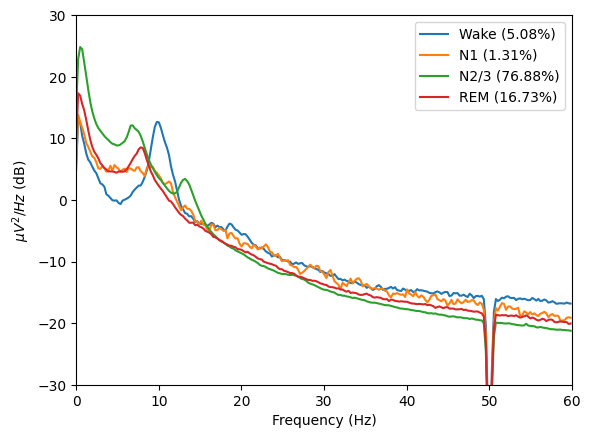

In [21]:
spectral_pipe.plot_psds(picks=["E101"], psd_range=(-30, 30))

Create a collage with rows for sleep stages and columns for bands.

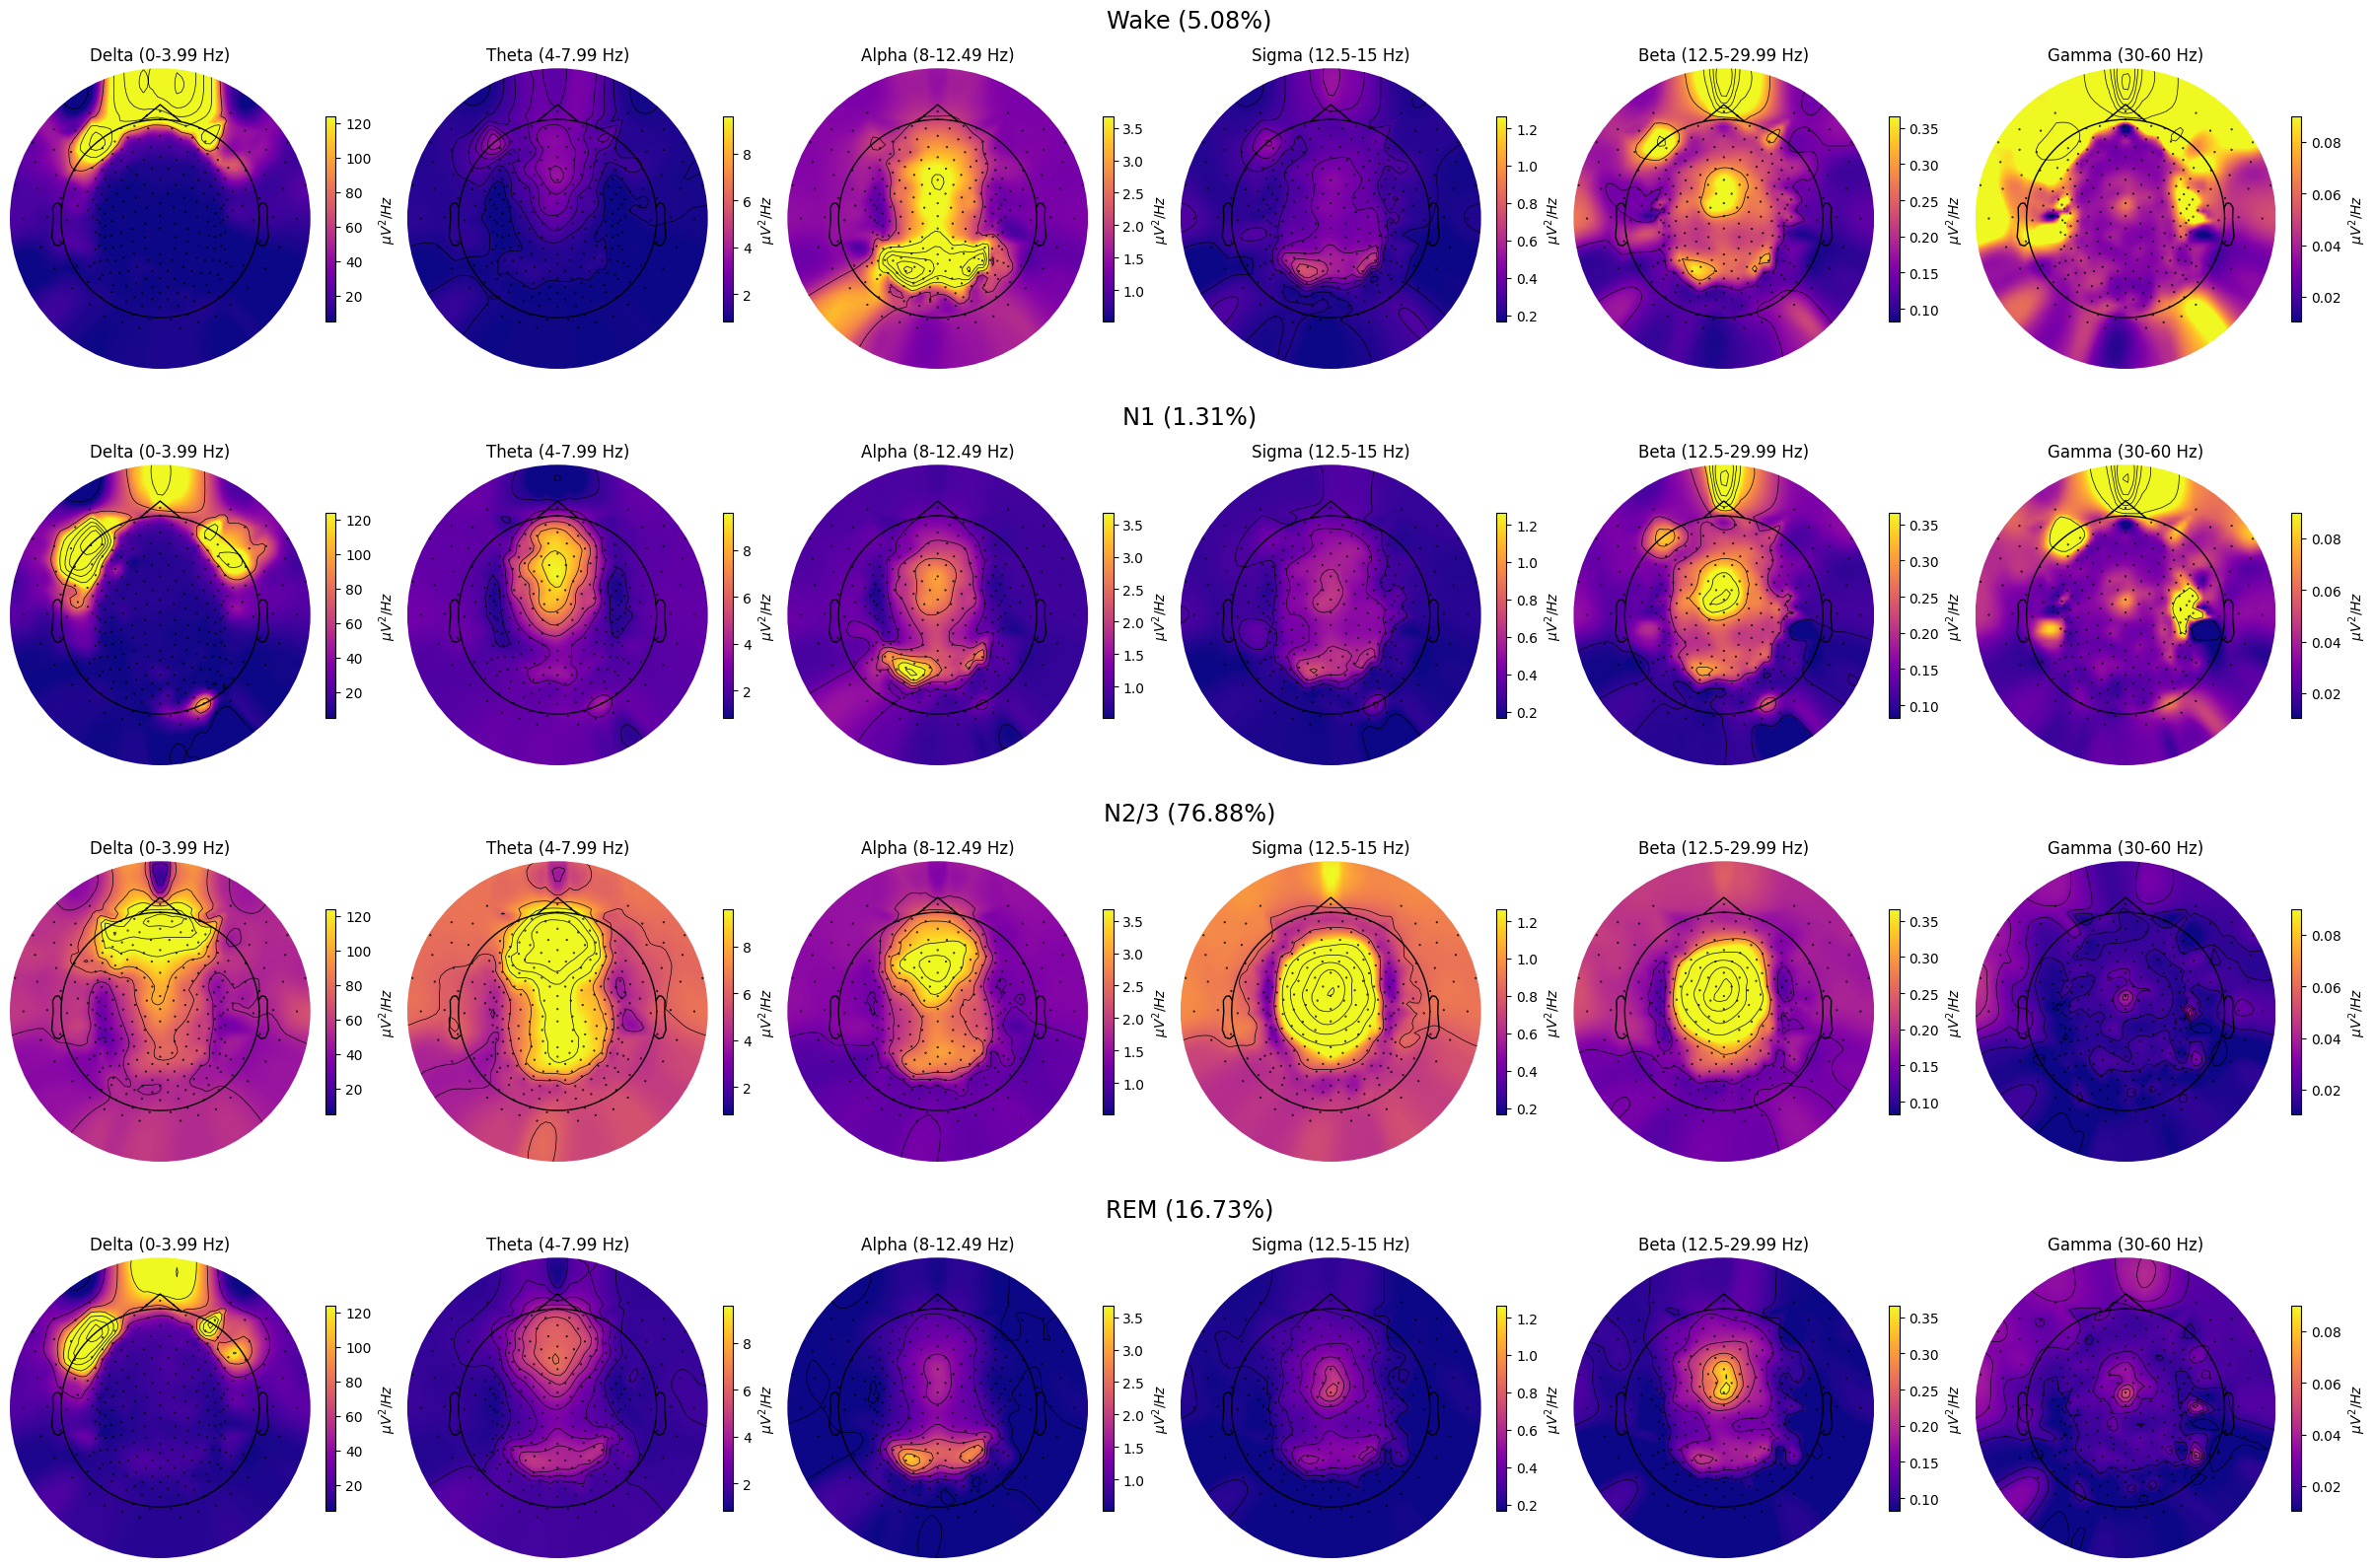

In [22]:
spectral_pipe.plot_topomap_collage()

## Events

Pass the preceding (cleaning or ICA or spectral) pipe to one of the SpindlesPipe, SlowWavesPipe or RapidEyeMovementsPipe. If the preceding is cleaning or ICA - provide path to the hypnogram and don't forget to pass its frequency to the corresponding parameter.

Hypnogram is SHORTER than data by 0.43 seconds. Padding hypnogram with last value to match data.size.


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   17.5s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    8.8s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   19.9s


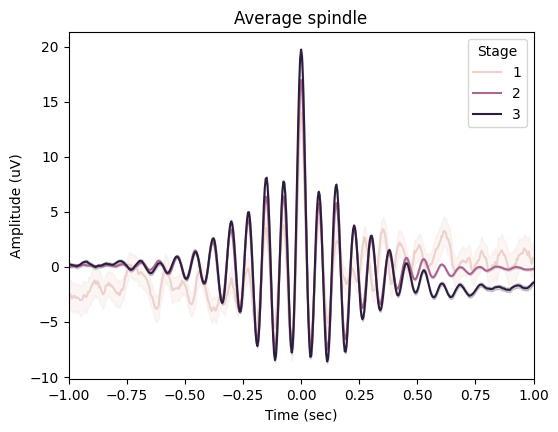

In [23]:
spindles_pipe = SpindlesPipe(prec_pipe=spectral_pipe)

spindles_pipe.detect()
spindles_pipe.plot_average(
    center="Peak",
    hue="Stage",
    time_before=1,
    time_after=1,
)

In [28]:
spindles_pipe.results.summary(grp_chan=False, grp_stage=True)

Count     Density  Duration  Amplitude       RMS  AbsPower  RelPower  \
Stage                                                                         
1        284   47.333333  0.777338  30.271558  6.556075  1.526533  0.348337   
2      48628  444.091324  0.803582  35.792433  7.836803  1.738045  0.402697   
3      22461  117.596859  0.752997  40.693810  9.037387  1.860951  0.384394   

       Frequency  Oscillations  Symmetry  
Stage                                     
1      13.056970      9.683099  0.525931  
2      13.149273     10.176133  0.513972  
3      13.195154      9.567250  0.517397

100%|██████████| 257/257 [00:48<00:00,  5.31it/s]


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


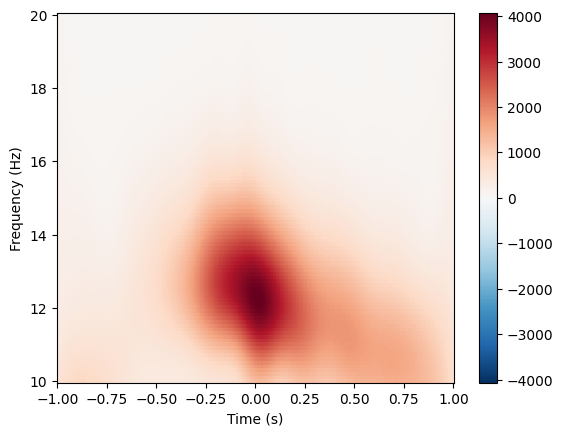

[<Figure size 640x480 with 2 Axes>]

In [30]:
spindles_pipe.compute_tfr(freqs=(10, 20), n_freqs=100, time_before=1, time_after=1)
spindles_pipe.tfrs["N2"].plot(["E101"])

Hypnogram is SHORTER than data by 0.43 seconds. Padding hypnogram with last value to match data.size.


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   17.5s


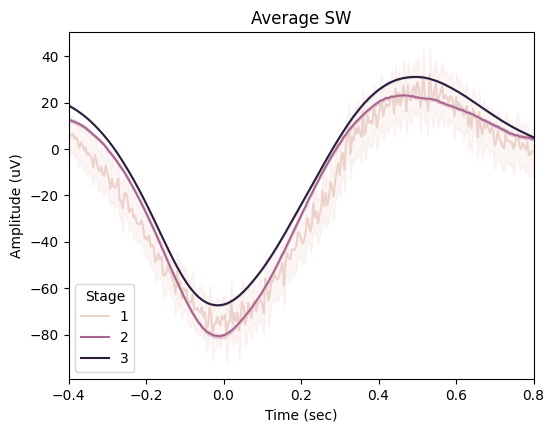

In [31]:
slow_waves_pipe = SlowWavesPipe(prec_pipe=spindles_pipe)

slow_waves_pipe.detect()
slow_waves_pipe.plot_average(
    center="NegPeak",
    hue="Stage",
    time_before=0.4,
    time_after=0.8,
)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


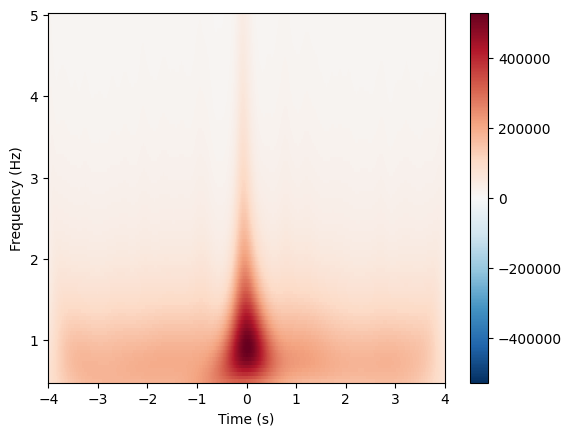

[<Figure size 640x480 with 2 Axes>]

In [35]:
slow_waves_pipe.compute_tfr(
    freqs=(0.5, 5), n_freqs=100, time_before=4, time_after=4, n_cycles=2
)
slow_waves_pipe.tfrs["N3"].plot(["E101"])

Hypnogram is SHORTER than data by 0.43 seconds. Padding hypnogram with last value to match data.size.


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting 289553 of 5985608 (4.84%) samples to NaN, retaining 5696055 (95.16%) samples.
Setting 289553 of 5985608 (4.84%) samples to NaN, retaining 5696055 (95.16%) samples.


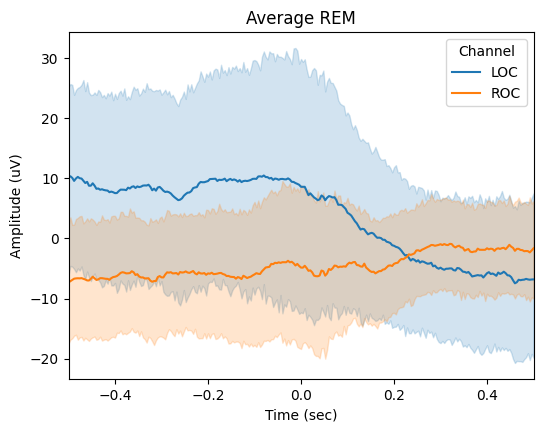

In [36]:
rems_pipe = RapidEyeMovementsPipe(prec_pipe=slow_waves_pipe)

rems_pipe.detect(
    loc_chname="E252",
    roc_chname="E226",
)

rems_pipe.plot_average(
    center="Peak",
    time_before=0.5,
    time_after=0.5,
    filt=(None, None),
    mask=None,
)